In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_recommenders as tfrs

In [2]:
filepaths = {
    'articles': '../../data/articles.csv',
    'customers': '../../data/customers.csv',
    'transactions': '../../data/transactions_train.csv'
}

In [3]:
articles = pd.read_csv(filepaths['articles'], dtype='str')
select_columns = ['article_id', 'product_code'] + [col for col in articles.columns if (not any(['_no' in col, '_id' in col, '_code' in col])) and (col != 'detail_desc')]
articles = articles[select_columns]
articles['article_id'] = articles['article_id'].astype('str')
articles['product_code'] = articles['product_code'].astype('str')
articles.head()

,article_id,product_code,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name
0,0108775015,0108775,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic
1,0108775044,0108775,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic
2,0108775051,0108775,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic
3,0110065001,0110065,OP T-shirt (Idro),Bra,Underwear,Solid,Black,Dark,Black,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear"
4,0110065002,0110065,OP T-shirt (Idro),Bra,Underwear,Solid,White,Light,White,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear"


In [4]:
article_inputs = {name: tf.keras.Input(shape=(1,), name=name, dtype=tf.string) for name in articles.columns}
article_inputs

{'article_id': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'article_id')>,
 'product_code': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'product_code')>,
 'prod_name': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'prod_name')>,
 'product_type_name': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'product_type_name')>,
 'product_group_name': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'product_group_name')>,
 'graphical_appearance_name': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'graphical_appearance_name')>,
 'colour_group_name': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'colour_group_name')>,
 'perceived_colour_value_name': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'perceived_colour_value_name')>,
 'perceived_colour_master_name': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'perceived_colour_master_name')>,
 'department_name': <Keras

In [5]:
processed_inputs = []

for name, input in article_inputs.items():
    lookup = tf.keras.layers.StringLookup(vocabulary=np.unique(articles[name].astype('str')))
    embed = tf.keras.layers.Embedding(articles[name].unique().shape[0], 32, input_length=1)

    x = lookup(input)
    x = embed(x)

    processed_inputs.append(x)

processed_inputs

2022-04-04 21:31:10.485988: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-04-04 21:31:10.540920: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-04-04 21:31:10.541196: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-04-04 21:31:10.541719: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

[<KerasTensor: shape=(None, 1, 32) dtype=float32 (created by layer 'embedding')>,
 <KerasTensor: shape=(None, 1, 32) dtype=float32 (created by layer 'embedding_1')>,
 <KerasTensor: shape=(None, 1, 32) dtype=float32 (created by layer 'embedding_2')>,
 <KerasTensor: shape=(None, 1, 32) dtype=float32 (created by layer 'embedding_3')>,
 <KerasTensor: shape=(None, 1, 32) dtype=float32 (created by layer 'embedding_4')>,
 <KerasTensor: shape=(None, 1, 32) dtype=float32 (created by layer 'embedding_5')>,
 <KerasTensor: shape=(None, 1, 32) dtype=float32 (created by layer 'embedding_6')>,
 <KerasTensor: shape=(None, 1, 32) dtype=float32 (created by layer 'embedding_7')>,
 <KerasTensor: shape=(None, 1, 32) dtype=float32 (created by layer 'embedding_8')>,
 <KerasTensor: shape=(None, 1, 32) dtype=float32 (created by layer 'embedding_9')>,
 <KerasTensor: shape=(None, 1, 32) dtype=float32 (created by layer 'embedding_10')>,
 <KerasTensor: shape=(None, 1, 32) dtype=float32 (created by layer 'embedding

In [6]:
processed_articles = tf.keras.layers.Concatenate()(processed_inputs)
articles_preprocessing = tf.keras.Model(article_inputs, processed_articles)

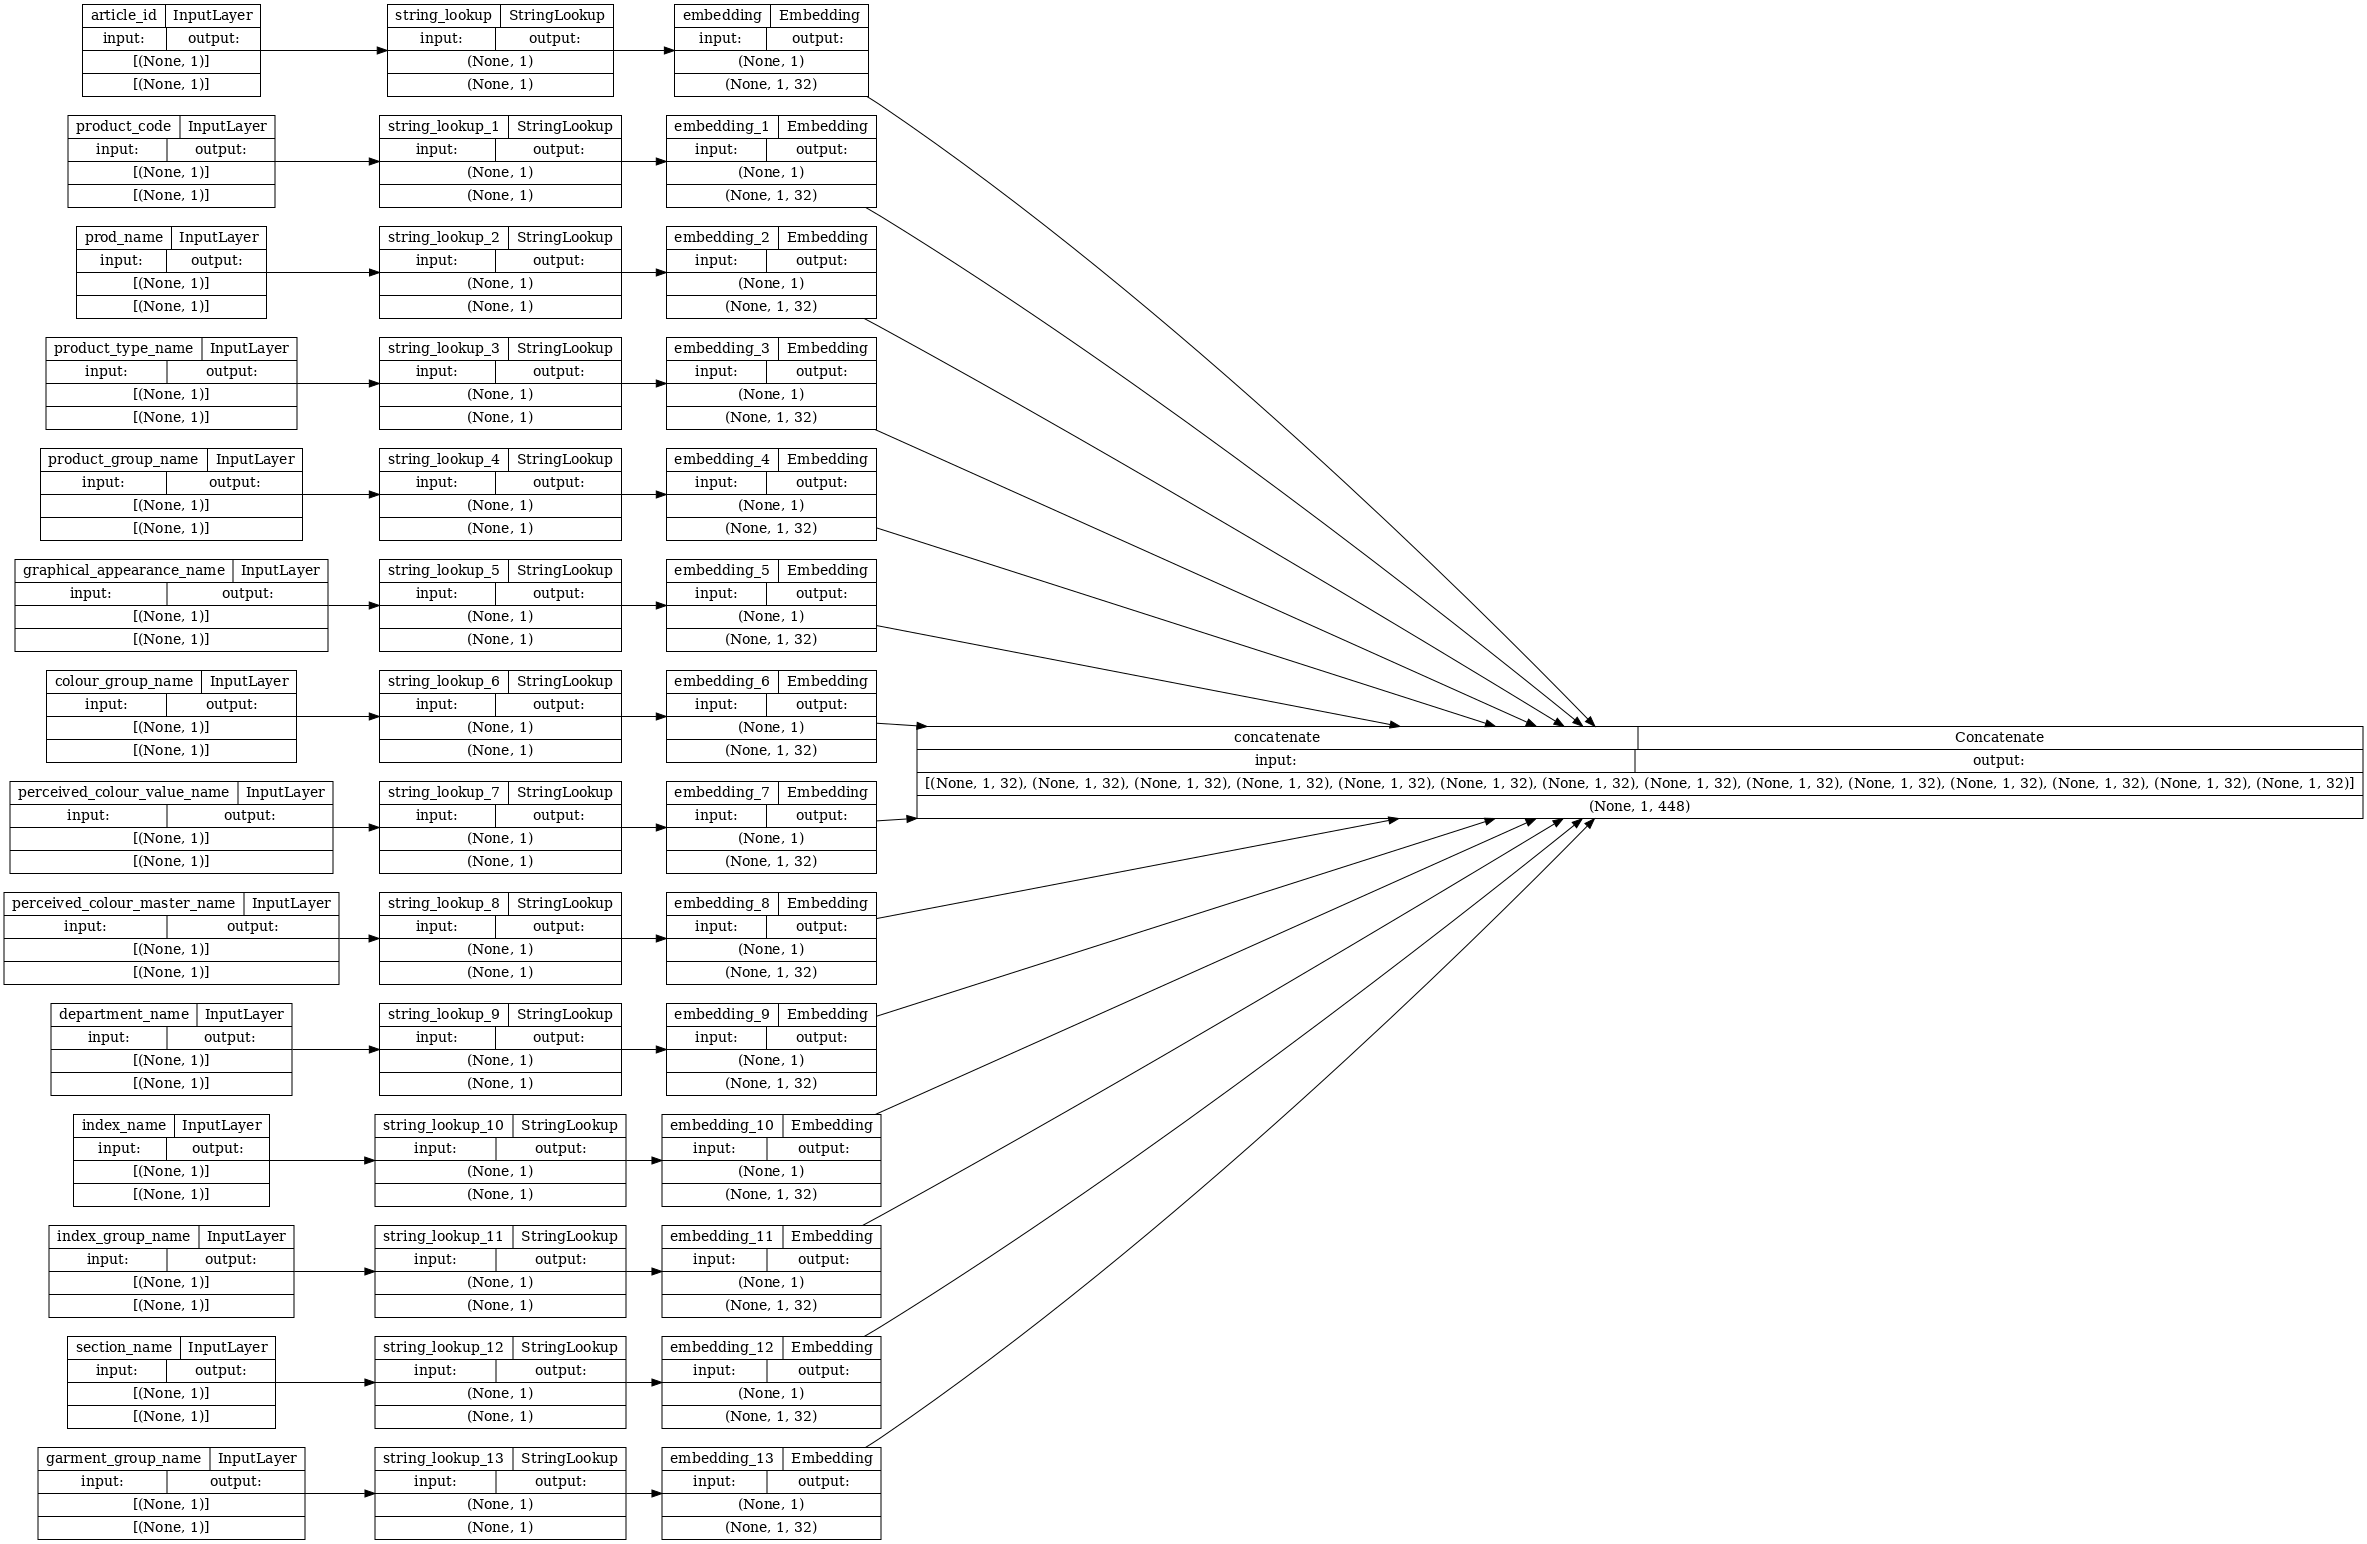

In [7]:
tf.keras.utils.plot_model(model = articles_preprocessing , rankdir="LR", dpi=72, show_shapes=True, to_file='./plots/articles_preproc.png')

In [8]:
customers = pd.read_csv(filepaths['customers'], dtype={
    'customer_id': 'str',
    'postal_code': 'str',
    'age': np.float32,
    'club_member_status': 'str',
    'fashion_news_frequency': 'str',
    'FN': np.float32,
    'Active': np.float32
})
customers['FN'].fillna(0.0, inplace=True)
customers['Active'].fillna(0.0, inplace=True)
customers['age'].fillna(-1.0, inplace=True)
customers['FN'] = customers['FN'].astype('bool')
customers['Active'] = customers['Active'].astype('bool')
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,False,False,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,False,False,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,False,False,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,False,False,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,True,True,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [9]:
customer_inputs = {
    'customer_id': tf.keras.Input(shape=(1,), name='customer_id', dtype=tf.string),
    'postal_code': tf.keras.Input(shape=(1,), name='postal_code', dtype=tf.string),
    'club_member_status': tf.keras.Input(shape=(1,), name='club_member_status', dtype=tf.string),
    'fashion_news_frequency': tf.keras.Input(shape=(1,), name='fashion_news_frequency', dtype=tf.string),
    'age': tf.keras.Input(shape=(1,), name='age', dtype=tf.float32),
    'FN': tf.keras.Input(shape=(1,), name='FN', dtype=tf.string),
    'Active': tf.keras.Input(shape=(1,), name='Active', dtype=tf.string)
}
customer_inputs

{'customer_id': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'customer_id')>,
 'postal_code': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'postal_code')>,
 'club_member_status': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'club_member_status')>,
 'fashion_news_frequency': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'fashion_news_frequency')>,
 'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'FN': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'FN')>,
 'Active': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'Active')>}

In [10]:
processed_inputs = []

for name, input in customer_inputs.items():
    if input.dtype == tf.string:
        lookup = tf.keras.layers.StringLookup(vocabulary=np.unique(customers[name].astype('str')))
        embed = tf.keras.layers.Embedding(customers[name].unique().shape[0], 32, input_length=1)

        x = lookup(input)
        x = embed(x)

        processed_inputs.append(x)
    else:
        x = tf.keras.layers.Reshape((1, 1))(input)
        processed_inputs.append(x)

processed_inputs

[<KerasTensor: shape=(None, 1, 32) dtype=float32 (created by layer 'embedding_14')>,
 <KerasTensor: shape=(None, 1, 32) dtype=float32 (created by layer 'embedding_15')>,
 <KerasTensor: shape=(None, 1, 32) dtype=float32 (created by layer 'embedding_16')>,
 <KerasTensor: shape=(None, 1, 32) dtype=float32 (created by layer 'embedding_17')>,
 <KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'reshape')>,
 <KerasTensor: shape=(None, 1, 32) dtype=float32 (created by layer 'embedding_18')>,
 <KerasTensor: shape=(None, 1, 32) dtype=float32 (created by layer 'embedding_19')>]

In [11]:
processed_customers = tf.keras.layers.Concatenate()(processed_inputs)
customers_preprocessing = tf.keras.Model(customer_inputs, processed_customers)

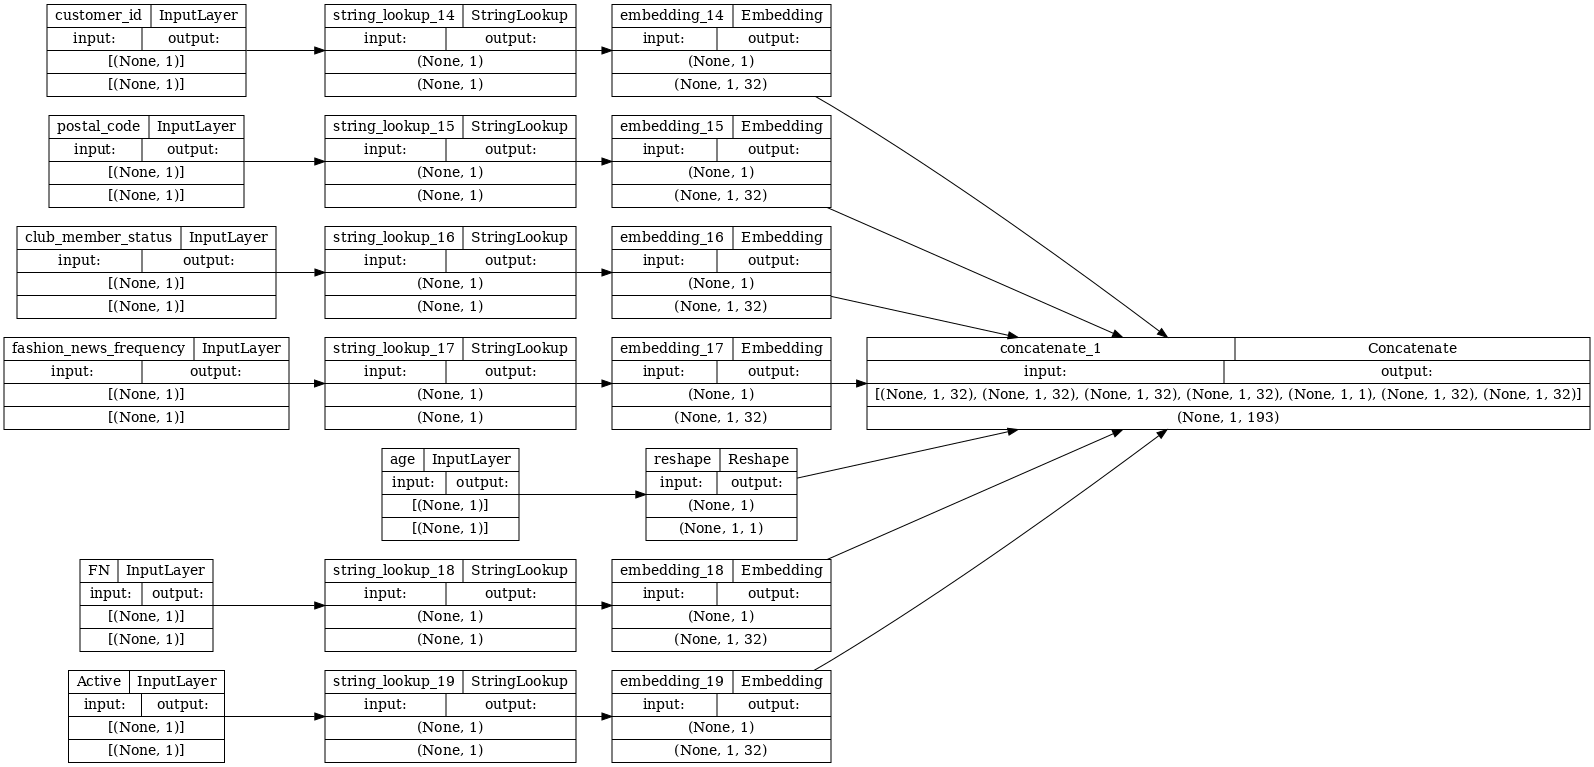

In [12]:
tf.keras.utils.plot_model(model = customers_preprocessing , rankdir="LR", dpi=72, show_shapes=True, to_file='./plots/customers_preproc.png')

In [14]:
articles_preprocessing.compile()
articles_preprocessing.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 article_id (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 product_code (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 prod_name (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 product_type_name (InputLayer)  [(None, 1)]         0           []                               
                                                                                              

In [15]:
customers_preprocessing.compile()
customers_preprocessing.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 customer_id (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 postal_code (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 club_member_status (InputLayer  [(None, 1)]         0           []                               
 )                                                                                                
                                                                                                  
 fashion_news_frequency (InputL  [(None, 1)]         0           []                         